In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import numpy as np
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
x=data.drop(["Outcome"],axis=1)
y=data.iloc[:,8].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6610 - accuracy: 0.6547 - val_loss: 0.6893 - val_accuracy: 0.6429
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6824 - val_loss: 0.6705 - val_accuracy: 0.6558
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6775 - val_loss: 0.6561 - val_accuracy: 0.6753
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.6889 - val_loss: 0.6438 - val_accuracy: 0.6883
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6954 - val_loss: 0.6337 - val_accuracy: 0.6948
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7117 - val_loss: 0.6256 - val_accuracy: 0.6883
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7182 - val_loss: 0.6176 - val_accuracy: 0.6948
Epoch 8/50
20/20 [==

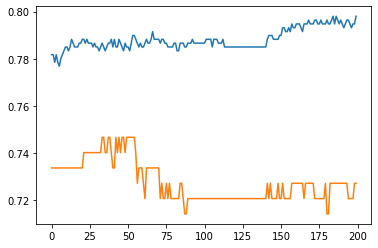

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history["accuracy"],label='train')
pyplot.plot(history.history["val_accuracy"],label='test')

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
y_pred=y_pred.astype(int)
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

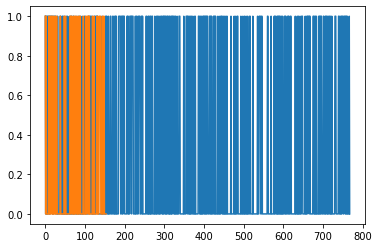

In [ ]:
pyplot.plot(y)
pyplot.plot(y_pred)

In [ ]:
pip install h5py

In [ ]:
from keras.models import model_from_json
import numpy
import os

In [ ]:
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 78.52%
Saved model to disk
Loaded model from disk
accuracy: 78.52%
